In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
path = r'/Users/umachidambaram/Aug-2021 Stock Analysis'

In [3]:
df = pd.read_csv(os.path.join(path, '6 Data', 'Prepared Data ', 'df_stock.csv'),index_col = False )

In [4]:
matplotlib.__version__

'3.3.4'

In [5]:
%matplotlib inline

In [6]:
df.head()

,Unnamed: 0,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [7]:
df.columns = ["RowCount", "Index", "Date", "Open", "High", "Low", "Close", "AdjustedClosingPrice", "Volume"]

In [8]:
# Check for correlation of columns

corr_matrix = df.corr()
df.corr()

,RowCount,Open,High,Low,Close,AdjustedClosingPrice,Volume
RowCount,1.000000,0.263521,0.263523,0.263565,0.263463,0.263468,-0.120199
Open,0.263521,1.000000,0.999959,0.999944,0.999907,0.999907,0.138673
High,0.263523,0.999959,1.000000,0.999931,0.999955,0.999955,0.138510
Low,0.263565,0.999944,0.999931,1.000000,0.999960,0.999960,0.138549
Close,0.263463,0.999907,0.999955,0.999960,1.000000,1.000000,0.138555
AdjustedClosingPrice,0.263468,0.999907,0.999955,0.999960,1.000000,1.000000,0.138560
Volume,-0.120199,0.138673,0.138510,0.138549,0.138555,0.138560,1.000000


<AxesSubplot:>

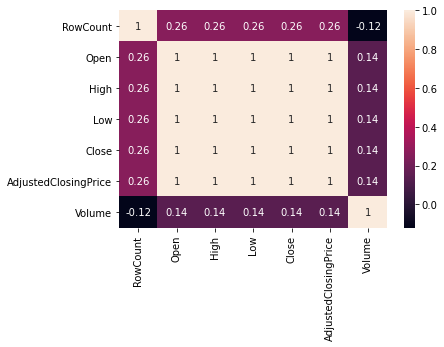

In [9]:
# Correlation matrix colored heatmap

myBasicCorr = df.corr()
sns.heatmap(myBasicCorr, annot = True)

<AxesSubplot:>

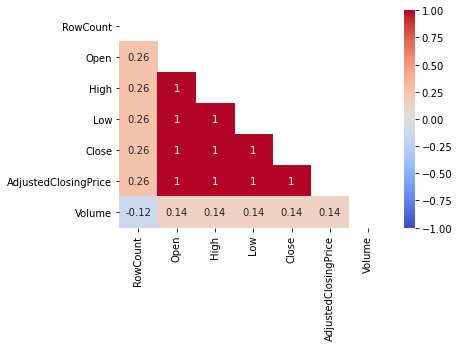

In [10]:
mask = np.zeros(myBasicCorr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sns.heatmap(myBasicCorr, vmin = -1, vmax = 1, center = 0, cmap =
           'coolwarm', annot = True, mask = mask)

In [ ]:
# High, Opening, Closing and Adjusted Closing are correlated highly with each other.

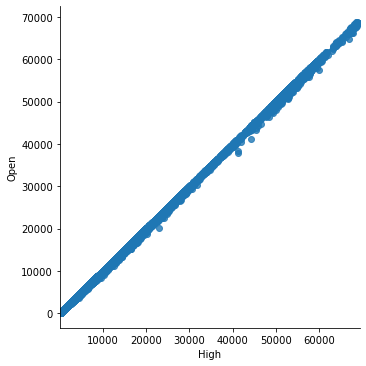

In [11]:
# Scatterplot of the High on day and Volume

sns.lmplot(x = 'High', y = 'Open', data = df)

In [ ]:
# Opening and Closing and linear correlated.

In [12]:
# Pairplot of the dataset

col = df[['Open', 'Close', 'AdjustedClosingPrice', 'Close','High', 'Low', 'Volume']]
pairplot = col[['Open', 'AdjustedClosingPrice', 'Volume', 'High']]

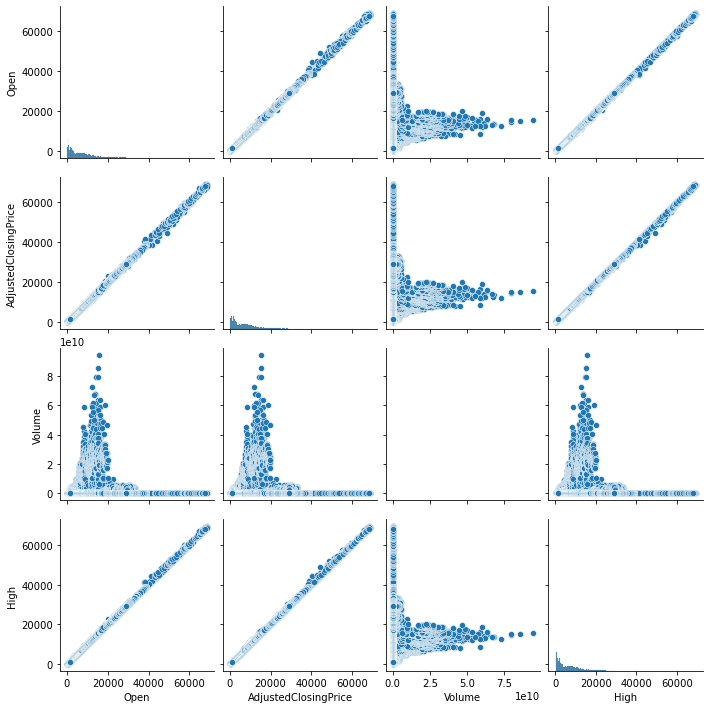

In [13]:
g = sns.pairplot(pairplot)

In [ ]:
# There is a huge increase in volume during the early years of data collection.

<AxesSubplot:xlabel='High', ylabel='Count'>

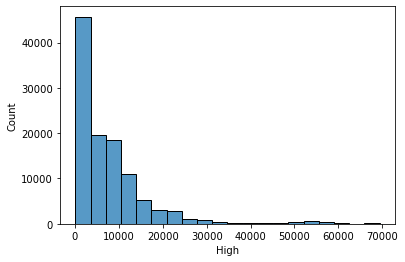

In [14]:
# Analyze column for categorical plot

sns.histplot(df['High'], bins = 20)

In [15]:
df.loc[df['High'] < 1000, 'Opening category'] = 'Low Opening'

In [16]:
df.loc[(df['High'] >= 1000) & (df['High'] < 10000), 'Opening category'] = 'Middle Opening'

In [17]:
df.loc[df['High'] >= 10000,  'Opening category'] = 'High Opening'

In [18]:
df['Opening category'].value_counts(dropna = False)

Middle Opening    64776
High Opening      28388
Low Opening       17089
Name: Opening category, dtype: int64

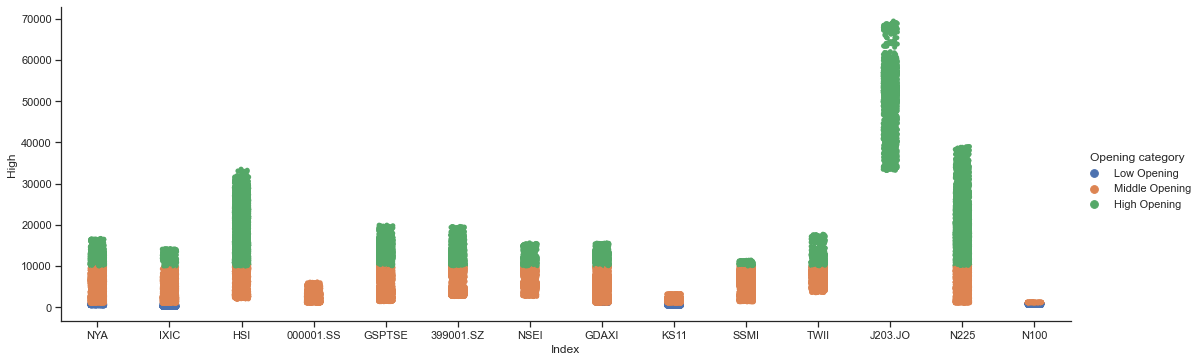

In [31]:
# Categorical Plot

sns.set(style="ticks")

g = sns.catplot(x="Index", y="High", hue="Opening category", data=df, height = 5, aspect = 3)


In [ ]:
# J203.JO has very high opening category, followed by N225 and HSI.